In [25]:
# Import necessary libraries
import numpy as np  # For numerical operations and handling arrays
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization using plots
import seaborn as sns  # For advanced data visualization

# Import preprocessing and machine learning libraries
from sklearn.preprocessing import StandardScaler  # Standardizes features by scaling
from sklearn.tree import DecisionTreeClassifier  # Decision Tree algorithm for classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  # Random Forest and AdaBoost ensemble classifiers
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.model_selection import KFold, LeaveOneGroupOut  # For cross-validation strategies
from sklearn.metrics import (  # For model performance evaluation
    accuracy_score,  # To calculate model accuracy
    precision_recall_fscore_support,  # For precision, recall, and F1-score metrics
    classification_report  # To generate a detailed performance report
)

# Code functionality:
# 1. Importing necessary libraries for data manipulation, visualization, preprocessing, and machine learning.
# 2. Provides tools for building classifiers, evaluating model performance, and performing cross-validation.

# Next steps would involve loading the dataset, preprocessing the data, training models,
# and evaluating their performance using metrics and visualizations.


In [26]:
# Load the training data (features) from a text file
X_train = np.loadtxt("UCI HAR Dataset/train/X_train.txt")  
# X_train contains the feature values for the training set.

# Load the training labels (target/output) from a text file and convert them to integers
y_train = np.loadtxt("UCI HAR Dataset/train/y_train.txt").astype(int)  
# y_train contains the activity labels corresponding to X_train.

# Load the test data (features) from a text file
X_test = np.loadtxt("UCI HAR Dataset/test/X_test.txt")  
# X_test contains the feature values for the test set.

# Load the test labels (target/output) from a text file and convert them to integers
y_test = np.loadtxt("UCI HAR Dataset/test/y_test.txt").astype(int)  
# y_test contains the activity labels corresponding to X_test.

# Load the subject identifiers (who performed the activities) for the training data
subjects = np.loadtxt("UCI HAR Dataset/train/subject_train.txt").astype(int)  
# subjects contains the IDs of individuals performing the activities in the training set.

# Overall:
# - The data comes from the UCI Human Activity Recognition (HAR) dataset.
# - `X_train` and `X_test` contain the features for training and testing, respectively.
# - `y_train` and `y_test` contain the corresponding activity labels (target classes).
# - `subjects` gives information about the subjects involved in the training data.


In [27]:
# Print the shape (dimensions) of the training features and labels
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")  
# X_train.shape gives the number of samples (rows) and features (columns) in the training dataset.
# y_train.shape gives the number of labels (rows) in the training dataset.

# Print the shape (dimensions) of the test features and labels
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")  
# X_test.shape gives the number of samples (rows) and features (columns) in the test dataset.
# y_test.shape gives the number of labels (rows) in the test dataset.

# Verification step:
# - Check if the data has been loaded correctly and examine the dimensions of the datasets.
# - Ensure that the number of labels matches the number of samples in both training and test sets.


X_train shape: (7352, 561), y_train shape: (7352,)
X_test shape: (2947, 561), y_test shape: (2947,)


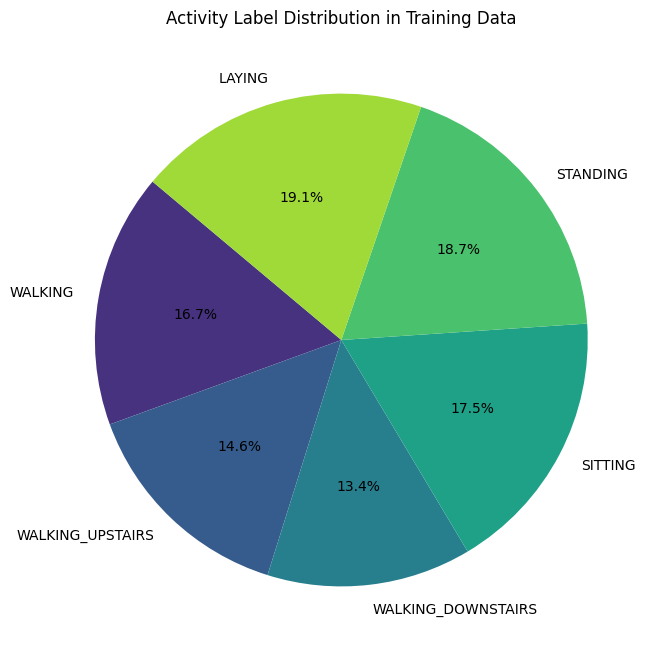

In [28]:
# Calculate the unique labels and their counts in the y_train dataset
unique, counts = np.unique(y_train, return_counts=True)  
# np.unique finds the unique values in y_train (activity labels) and counts their occurrences.
# 'unique' stores the unique activity labels, and 'counts' stores the number of times each label appears.

# Create a pie chart to visualize the distribution of activity labels
plt.figure(figsize=(8, 8))  # Set the size of the pie chart figure to 8x8 inches.
plt.pie(counts,  # Use the counts of each activity as the pie chart data.
        labels=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", 
                "SITTING", "STANDING", "LAYING"],  # Provide corresponding activity names as labels.
        autopct='%1.1f%%',  # Display percentages on the pie chart with one decimal place.
        startangle=140,  # Start the pie chart at a 140-degree angle for better visual appearance.
        colors=sns.color_palette("viridis", len(unique)))  # Use the 'viridis' color palette with as many colors as unique labels.

# Add a title to the pie chart
plt.title("Activity Label Distribution in Training Data")  

# Display the pie chart
plt.show()  

# This code:
# - Calculates the distribution of activity labels in the training data.
# - Visualizes the distribution as a pie chart for better understanding of the dataset's class balance.




In [30]:
# Initialize the StandardScaler to normalize the data
scaler = StandardScaler()

# Normalize the training data using fit_transform
X_train_scaled = scaler.fit_transform(X_train)

# Normalize the test data using transform (without fitting again)
X_test_scaled = scaler.transform(X_test)


In [31]:
# Lists to store training and testing accuracy
training_acc = []
testing_acc = []


In [32]:
# Iterate over different depths for the Decision Tree
for max_depth in range(1, 21):  
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)  # Initialize the Decision Tree classifier
    dt_classifier.fit(X_train_scaled, y_train)  # Train the classifier on scaled training data
    
    # Append training and testing accuracies to the respective lists
    training_acc.append(dt_classifier.score(X_train_scaled, y_train))  
    testing_acc.append(dt_classifier.score(X_test_scaled, y_test))  


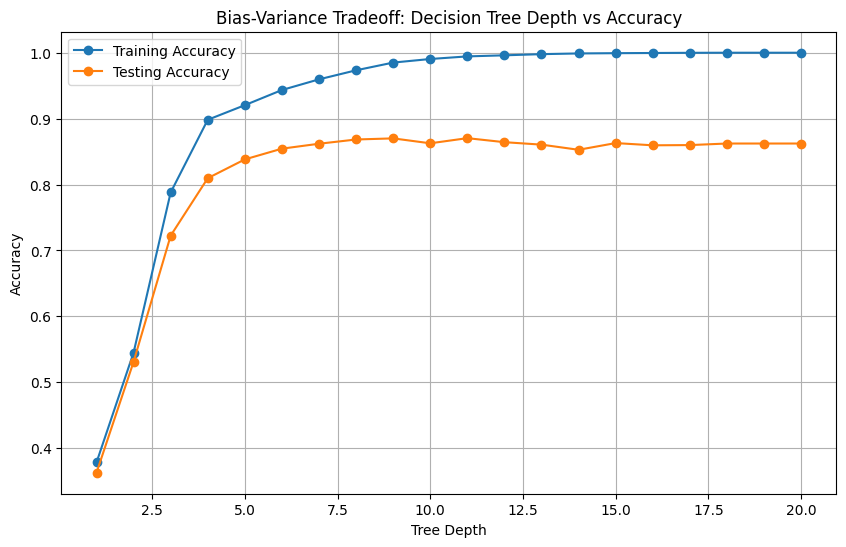

In [33]:
# Plot the Bias-Variance Tradeoff
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), training_acc, label="Training Accuracy", marker='o')  # Plot training accuracy
plt.plot(range(1, 21), testing_acc, label="Testing Accuracy", marker='o')  # Plot testing accuracy
plt.xlabel("Tree Depth")  # X-axis label
plt.ylabel("Accuracy")  # Y-axis label
plt.title("Bias-Variance Tradeoff: Decision Tree Depth vs Accuracy")  # Plot title
plt.legend()  # Display legend
plt.grid()  # Show grid
plt.show()  # Show the plot
